In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt

In [2]:
df = pd.read_csv('student_info.csv')


In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
study_hours      195 non-null float64
student_marks    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


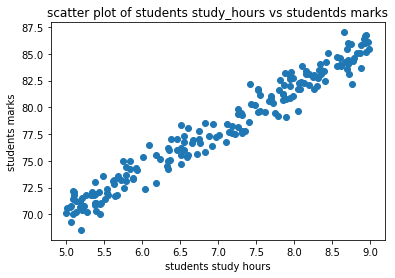

In [7]:
plt.scatter(x = df['study_hours'] , y = df['student_marks'])
plt.xlabel('students study hours')
plt.ylabel('students marks')
plt.title('scatter plot of students study_hours vs studentds marks')
plt.show()

In [8]:
#data cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
df1 = df.fillna(df.mean())

In [11]:
df1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
X = df1.drop("student_marks", axis = "columns")
y = df1.drop("study_hours", axis = "columns")


In [13]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state = 51)

In [21]:
#select model and train the model

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



In [23]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns = ['study_hours','student_marks_original','students_marks_predicted'])

,study_hours,student_marks_original,students_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [24]:
lr.score(X_test,y_test)

0.9514124242154464

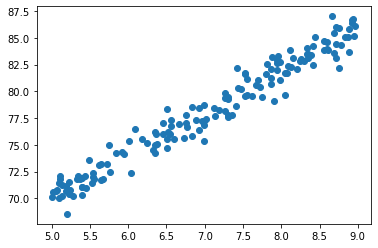

In [25]:
plt.scatter(X_train,y_train)

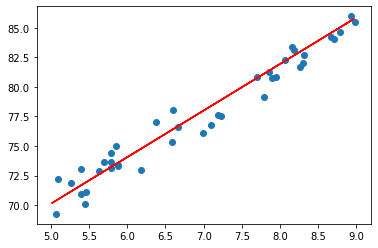

In [28]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train) , color = 'r')

In [29]:
#Present your solution
import joblib
joblib.dump(lr,'student_marks_predictor.pkl')

['student_marks_predictor.pkl']

In [30]:
model = joblib.load('student_marks_predictor.pkl')

In [37]:
a = model.predict([[5]])[0][0]
print('precentage of student predicted by the model is::', a)

precentage of student predicted by the model is:: 70.12594512018406
